# Advent of Code 2025

In [5]:
import java.io.File
abstract class Problem<T>(private val filename: String) {
    abstract val testResult: T
    protected var isTesting: Boolean = true
        private set
    fun run() {
        val testOutput = File("testData/$filename").useLines { solve(it) }
        if (testOutput != testResult) {
            throw IllegalStateException("Test output doesn't match expected result \n Actual: $testOutput \n Expected: $testResult")
        }
        println("Test results: Expected=$testResult Actual=$testOutput")

        isTesting = false
        val actualOutput = File("data/$filename").useLines { solve(it) }
        println("Solution: $actualOutput")
    }
    abstract fun solve(lines: Sequence<String>): T
}

## Day 2: Invalid IDs
### Part 1
You get inside and take the elevator to its only other stop: the gift shop. "Thank you for visiting the North Pole!" gleefully exclaims a nearby sign. You aren't sure who is even allowed to visit the North Pole, but you know you can access the lobby through here, and from there you can access the rest of the North Pole base.

As you make your way through the surprisingly extensive selection, one of the clerks recognizes you and asks for your help.

As it turns out, one of the younger Elves was playing on a gift shop computer and managed to add a whole bunch of invalid product IDs to their gift shop database! Surely, it would be no trouble for you to identify the invalid product IDs for them, right?

They've even checked most of the product ID ranges already; they only have a few product ID ranges (your puzzle input) that you'll need to check. For example:

```
11-22,95-115,998-1012,1188511880-1188511890,222220-222224,
1698522-1698528,446443-446449,38593856-38593862,565653-565659,
824824821-824824827,2121212118-2121212124
```
(The ID ranges are wrapped here for legibility; in your input, they appear on a single long line.)

The ranges are separated by commas (,); each range gives its first ID and last ID separated by a dash (-).

Since the young Elf was just doing silly patterns, you can find the invalid IDs by looking for any ID which is made only of some sequence of digits repeated twice. So, `55` (5 twice), `6464` (64 twice), and `123123` (123 twice) would all be invalid IDs.

None of the numbers have leading zeroes; `0101` isn't an ID at all. (`101` is a valid ID that you would ignore.)

Your job is to find all of the invalid IDs that appear in the given ranges. In the above example:

`11-22` has two invalid IDs, `11` and `22`.
`95-115` has one invalid ID, `99`.
`998-1012` has one invalid ID, `1010`.
`1188511880-1188511890` has one invalid ID, `1188511885`.
`222220-222224` has one invalid ID, `222222`.
`1698522-1698528` contains no invalid IDs.
`446443-446449` has one invalid ID, `446446`.
`38593856-38593862` has one invalid ID, `38593859`.
The rest of the ranges contain no invalid IDs.
Adding up all the invalid IDs in this example produces `1227775554`.

What do you get if you add up all of the invalid IDs?

In [8]:
class DayTwoPartOne(override val testResult: Long = 1227775554L) : Problem<Long>("day2.txt") {
    override fun solve(lines: Sequence<String>): Long {
        var acc = 0L
        lines
            .first()
            .split(",")
            .map { it.substringBefore("-") to it.substringAfter("-") }
            .forEach { split ->
                for (i in split.first.toLong()..split.second.toLong()) {
                    val str = i.toString()
                    if (str.length % 2 == 0 && str.take(str.length / 2) == str.takeLast(str.length / 2)) {
                        acc += i
                    }
                }
            }
        return acc
    }
}

DayTwoPartOne().run()

Test results: Expected=1227775554 Actual=1227775554
Solution: 23534117921


### Part 2
The clerk quickly discovers that there are still invalid IDs in the ranges in your list. Maybe the young Elf was doing other silly patterns as well?

Now, an ID is invalid if it is made only of some sequence of digits repeated at least twice. So, `12341234` (`1234` two times), `123123123` (`123` three times), `1212121212` (`12` five times), and `1111111` (`1` seven times) are all invalid IDs.

From the same example as before:

`11-22` still has two invalid IDs, `11` and `22`.
`95-115` now has two invalid IDs, `99` and `111`.
`998-1012` now has two invalid IDs, `999` and `1010`.
`1188511880-1188511890` still has one invalid ID, `1188511885`.
`222220-222224` still has one invalid ID, `222222`.
`1698522-1698528` still contains no invalid IDs.
`446443-446449` still has one invalid ID, `446446`.
`38593856-38593862` still has one invalid ID, `38593859`.
`565653-565659` now has one invalid ID, `565656`.
`824824821-824824827` now has one invalid ID, `824824824`.
`2121212118-2121212124` now has one invalid ID, `121212121`.
Adding up all the invalid IDs in this example produces `4174379265`.

What do you get if you add up all of the invalid IDs using these new rules?

In [9]:
class DayTwoPartTwo(override val testResult: Long = 4174379265) : Problem<Long>("day2.txt") {
    override fun solve(lines: Sequence<String>): Long {
        var acc = 0L
        lines
            .first()
            .split(",")
            .map { it.substringBefore("-") to it.substringAfter("-") }
            .forEach { split ->
                for (i in split.first.toLong()..split.second.toLong()) {
                    if (i < 10) continue
                    val str = i.toString()
                    if (str.all { it == str.first() }) {
                        acc += i
                        continue
                    }

                    for (j in (str.length / 2) downTo 2) {
                        val chunked = str.chunked(j)
                        if (chunked.size > 1 && chunked.all { it == chunked.first() }) {
                            acc += i
                            break
                        }
                    }
                }
        }
        return acc
    }
}

DayTwoPartTwo().run()

Test results: Expected=4174379265 Actual=4174379265
Solution: 31755323497


## Day 3: Escalator batteries

### Part 1
You descend a short staircase, enter the surprisingly vast lobby, and are quickly cleared by the security checkpoint. When you get to the main elevators, however, you discover that each one has a red light above it: they're all offline.

"Sorry about that," an Elf apologizes as she tinkers with a nearby control panel. "Some kind of electrical surge seems to have fried them. I'll try to get them online soon."

You explain your need to get further underground. "Well, you could at least take the escalator down to the printing department, not that you'd get much further than that without the elevators working. That is, you could if the escalator weren't also offline."

"But, don't worry! It's not fried; it just needs power. Maybe you can get it running while I keep working on the elevators."

There are batteries nearby that can supply emergency power to the escalator for just such an occasion. The batteries are each labeled with their joltage rating, a value from `1` to `9`. You make a note of their joltage ratings (your puzzle input). For example:
```
987654321111111
811111111111119
234234234234278
818181911112111
```
The batteries are arranged into banks; each line of digits in your input corresponds to a single bank of batteries. Within each bank, you need to turn on exactly two batteries; the joltage that the bank produces is equal to the number formed by the digits on the batteries you've turned on. For example, if you have a bank like `12345` and you turn on batteries `2` and `4`, the bank would produce `24` jolts. (You cannot rearrange batteries.)

You'll need to find the largest possible joltage each bank can produce. In the above example:

In `987654321111111`, you can make the largest joltage possible, `98`, by turning on the first two batteries.
In `811111111111119`, you can make the largest joltage possible by turning on the batteries labeled `8` and `9`, producing `89` jolts.
In `234234234234278`, you can make `78` by turning on the last two batteries (marked `7` and `8`).
In `818181911112111`, the largest joltage you can produce is `92`.
The total output joltage is the sum of the maximum joltage from each bank, so in this example, the total output joltage is `98` + `89` + `78` + `92` = `357`.

There are many batteries in front of you. Find the maximum joltage possible from each bank; what is the total output joltage?

In [10]:
class DayThreePartOne(override val testResult: Int = 357) : Problem<Int>("day3.txt") {
    override fun solve(lines: Sequence<String>): Int = lines.sumOf { line ->
        val batteries = line.map { it.digitToInt() }
        val first = batteries.dropLast(1).withIndex().maxBy { it.value }
        val second = batteries.drop(first.index + 1).max()
        "${first.value}$second".toInt()
    }
}

DayThreePartOne().run()

Test results: Expected=357 Actual=357
Solution: 16973


### Part 2
The escalator doesn't move. The Elf explains that it probably needs more joltage to overcome the static friction of the system and hits the big red "joltage limit safety override" button. You lose count of the number of times she needs to confirm "yes, I'm sure" and decorate the lobby a bit while you wait.

Now, you need to make the largest joltage by turning on exactly twelve batteries within each bank.

The joltage output for the bank is still the number formed by the digits of the batteries you've turned on; the only difference is that now there will be 12 digits in each bank's joltage output instead of two.

Consider again the example from before:

987654321111111
811111111111119
234234234234278
818181911112111
Now, the joltages are much larger:

In 987654321111111, the largest joltage can be found by turning on everything except some 1s at the end to produce 987654321111.
In the digit sequence 811111111111119, the largest joltage can be found by turning on everything except some 1s, producing 811111111119.
In 234234234234278, the largest joltage can be found by turning on everything except a 2 battery, a 3 battery, and another 2 battery near the start to produce 434234234278.
In 818181911112111, the joltage 888911112111 is produced by turning on everything except some 1s near the front.
The total output joltage is now much larger: 987654321111 + 811111111119 + 434234234278 + 888911112111 = 3121910778619.

What is the new total output joltage?

In [11]:
class DayThreePartTwo(override val testResult: Long = 3121910778619L) : Problem<Long>("day3.txt") {
    override fun solve(lines: Sequence<String>): Long = lines.sumOf { line ->
        val batteries = line.map { it.digitToInt() }
        var acc = ""
        var indexOfLastBatteryUsed = -1
        for (i in 11 downTo 0) {
            val battery = batteries.withIndex().drop(indexOfLastBatteryUsed + 1).dropLast(i).maxBy { it.value }
            indexOfLastBatteryUsed = battery.index
            acc += battery.value
        }
        acc.toLong()
    }
}

DayThreePartTwo().run()

Test results: Expected=3121910778619 Actual=3121910778619
Solution: 168027167146027


## Day 4: Paper rolls
### Part 1
You ride the escalator down to the printing department. They're clearly getting ready for Christmas; they have lots of large rolls of paper everywhere, and there's even a massive printer in the corner (to handle the really big print jobs).

Decorating here will be easy: they can make their own decorations. What you really need is a way to get further into the North Pole base while the elevators are offline.

"Actually, maybe we can help with that," one of the Elves replies when you ask for help. "We're pretty sure there's a cafeteria on the other side of the back wall. If we could break through the wall, you'd be able to keep moving. It's too bad all of our forklifts are so busy moving those big rolls of paper around."

If you can optimize the work the forklifts are doing, maybe they would have time to spare to break through the wall.

The rolls of paper (`@`) are arranged on a large grid; the Elves even have a helpful diagram (your puzzle input) indicating where everything is located.

For example:
```
..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@.
```
The forklifts can only access a roll of paper if there are fewer than four rolls of paper in the eight adjacent positions. If you can figure out which rolls of paper the forklifts can access, they'll spend less time looking and more time breaking down the wall to the cafeteria.

In this example, there are `13` rolls of paper that can be accessed by a forklift (marked with x):
```
..xx.xx@x.
x@@.@.@.@@
@@@@@.x.@@
@.@@@@..@.
x@.@@@@.@x
.@@@@@@@.@
.@.@.@.@@@
x.@@@.@@@@
.@@@@@@@@.
x.x.@@@.x.
```
Consider your complete diagram of the paper roll locations. How many rolls of paper can be accessed by a forklift?

In [12]:
class DayFourPartOne(override val testResult: Int = 13) : Problem<Int>("day4.txt") {
    private val d = listOf(
        -1 to -1,
        -1 to 0,
        -1 to 1,
        0 to -1,
        0 to 1,
        1 to -1,
        1 to 0,
        1 to 1,
    )

    override fun solve(lines: Sequence<String>): Int {
        val lineList = lines.toList()
        val height = lineList.size + 2
        val width = lineList[0].length + 2
        val matrix = Array(height) { row ->
            Array(width) { column ->
                if (row == 0 || row == height - 1 || column == 0 || column == width - 1) {
                    EMPTY
                } else {
                    lineList[row - 1][column - 1]
                }
            }
        }

        var acc = 0
        for (row in 1..(matrix.size - 2)) {
            for (col in 1..(matrix[0].size - 2)) {
                if (matrix[row][col] == ROLL && d.sumOf { (i, j) -> if (matrix[row + i][col + j] == ROLL) 1 else 0 } < 4) {
                    acc++
                }
            }
        }
        return acc
    }

    companion object {
        private const val ROLL = '@'
        private const val EMPTY = '.'
    }
}

DayFourPartOne().run()

Test results: Expected=13 Actual=13
Solution: 1397


class DayFourPartTwo(override val testResult: Int = 43) : Problem<Int>("day4.txt") {
    private val d = listOf(
        -1 to -1,
        -1 to 0,
        -1 to 1,
        0 to -1,
        0 to 1,
        1 to -1,
        1 to 0,
        1 to 1,
    )

    override fun solve(lines: Sequence<String>): Int {
        val lineList = lines.toList()
        val height = lineList.size + 2
        val width = lineList[0].length + 2
        val matrix = Array(height) { row ->
            Array(width) { column ->
                if (row == 0 || row == height - 1 || column == 0 || column == width - 1) {
                    EMPTY
                } else {
                    lineList[row - 1][column - 1]
                }
            }
        }

        var acc = 0
        var updates = 0
        do {
            updates = 0
            for (row in 1..(matrix.size - 2)) {
                for (col in 1..(matrix[0].size - 2)) {
                    if (matrix[row][col] == ROLL && d.sumOf { (i, j) -> if (matrix[row + i][col + j] == ROLL) 1 else 0 } < 4) {
                        matrix[row][col] = EMPTY
                        updates++
                        acc++
                    }
                }
            }
        } while (updates != 0)
        return acc
    }

    companion object {
        private const val ROLL = '@'
        private const val EMPTY = '.'
    }
}

DayFourPartTwo().run()

### Part 2
Now, the Elves just need help accessing as much of the paper as they can.

Once a roll of paper can be accessed by a forklift, it can be removed. Once a roll of paper is removed, the forklifts might be able to access more rolls of paper, which they might also be able to remove. How many total rolls of paper could the Elves remove if they keep repeating this process?

Starting with the same example as above, here is one way you could remove as many rolls of paper as possible, using highlighted @ to indicate that a roll of paper is about to be removed, and using x to indicate that a roll of paper was just removed:
```
Initial state:
..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@.

Remove 13 rolls of paper:
..xx.xx@x.
x@@.@.@.@@
@@@@@.x.@@
@.@@@@..@.
x@.@@@@.@x
.@@@@@@@.@
.@.@.@.@@@
x.@@@.@@@@
.@@@@@@@@.
x.x.@@@.x.

Remove 12 rolls of paper:
.......x..
.@@.x.x.@x
x@@@@...@@
x.@@@@..x.
.@.@@@@.x.
.x@@@@@@.x
.x.@.@.@@@
..@@@.@@@@
.x@@@@@@@.
....@@@...

Remove 7 rolls of paper:
..........
.x@.....x.
.@@@@...xx
..@@@@....
.x.@@@@...
..@@@@@@..
...@.@.@@x
..@@@.@@@@
..x@@@@@@.
....@@@...

Remove 5 rolls of paper:
..........
..x.......
.x@@@.....
..@@@@....
...@@@@...
..x@@@@@..
...@.@.@@.
..x@@.@@@x
...@@@@@@.
....@@@...

Remove 2 rolls of paper:
..........
..........
..x@@.....
..@@@@....
...@@@@...
...@@@@@..
...@.@.@@.
...@@.@@@.
...@@@@@x.
....@@@...

Remove 1 roll of paper:
..........
..........
...@@.....
..x@@@....
...@@@@...
...@@@@@..
...@.@.@@.
...@@.@@@.
...@@@@@..
....@@@...

Remove 1 roll of paper:
..........
..........
...x@.....
...@@@....
...@@@@...
...@@@@@..
...@.@.@@.
...@@.@@@.
...@@@@@..
....@@@...

Remove 1 roll of paper:
..........
..........
....x.....
...@@@....
...@@@@...
...@@@@@..
...@.@.@@.
...@@.@@@.
...@@@@@..
....@@@...

Remove 1 roll of paper:
..........
..........
..........
...x@@....
...@@@@...
...@@@@@..
...@.@.@@.
...@@.@@@.
...@@@@@..
....@@@...
```
Stop once no more rolls of paper are accessible by a forklift. In this example, a total of 43 rolls of paper can be removed.

Start with your original diagram. How many rolls of paper in total can be removed by the Elves and their forklifts?

In [13]:
class DayFourPartTwo(override val testResult: Int = 43) : Problem<Int>("day4.txt") {
    private val d = listOf(
        -1 to -1,
        -1 to 0,
        -1 to 1,
        0 to -1,
        0 to 1,
        1 to -1,
        1 to 0,
        1 to 1,
    )

    override fun solve(lines: Sequence<String>): Int {
        val lineList = lines.toList()
        val height = lineList.size + 2
        val width = lineList[0].length + 2
        val matrix = Array(height) { row ->
            Array(width) { column ->
                if (row == 0 || row == height - 1 || column == 0 || column == width - 1) {
                    EMPTY
                } else {
                    lineList[row - 1][column - 1]
                }
            }
        }

        var acc = 0
        var updates = 0
        do {
            updates = 0
            for (row in 1..(matrix.size - 2)) {
                for (col in 1..(matrix[0].size - 2)) {
                    if (matrix[row][col] == ROLL && d.sumOf { (i, j) -> if (matrix[row + i][col + j] == ROLL) 1 else 0 } < 4) {
                        matrix[row][col] = EMPTY
                        updates++
                        acc++
                    }
                }
            }
        } while (updates != 0)
        return acc
    }

    companion object {
        private const val ROLL = '@'
        private const val EMPTY = '.'
    }
}

DayFourPartTwo().run()

Test results: Expected=43 Actual=43
Solution: 8758


## Day 5: Fresh Ingredients
### Part 1
As the forklifts break through the wall, the Elves are delighted to discover that there was a cafeteria on the other side after all.

You can hear a commotion coming from the kitchen. "At this rate, we won't have any time left to put the wreaths up in the dining hall!" Resolute in your quest, you investigate.

"If only we hadn't switched to the new inventory management system right before Christmas!" another Elf exclaims. You ask what's going on.

The Elves in the kitchen explain the situation: because of their complicated new inventory management system, they can't figure out which of their ingredients are fresh and which are spoiled. When you ask how it works, they give you a copy of their database (your puzzle input).

The database operates on ingredient IDs. It consists of a list of fresh ingredient ID ranges, a blank line, and a list of available ingredient IDs. For example:
```
3-5
10-14
16-20
12-18

1
5
8
11
17
32
```
The fresh ID ranges are inclusive: the range `3-5` means that ingredient IDs `3`, `4`, and `5` are all fresh. The ranges can also overlap; an ingredient ID is fresh if it is in any range.

The Elves are trying to determine which of the available ingredient IDs are fresh. In this example, this is done as follows:

Ingredient ID `1` is spoiled because it does not fall into any range.
Ingredient ID `5` is fresh because it falls into range `3-5`.
Ingredient ID `8` is spoiled.
Ingredient ID `11` is fresh because it falls into range `10-14`.
Ingredient ID `17` is fresh because it falls into range `16-20` as well as range `12-18`.
Ingredient ID `32` is spoiled.
So, in this example, `3` of the available ingredient IDs are fresh.

Process the database file from the new inventory management system. How many of the available ingredient IDs are fresh?

In [14]:
class DayFivePartOne(override val testResult: Int = 3) : Problem<Int>("day5.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val lineList = lines.toList()
        val okayIds = lineList
            .takeWhile { it.isNotBlank() }
            .map { it.substringBefore("-").toLong() to it.substringAfter("-").toLong() }
        val ingredients = lineList.dropWhile { it.contains("-") || it.isBlank() }.map { it.toLong() }
        val freshIds = mutableSetOf<Long>()
        okayIds.forEach { (start, end) ->
            ingredients.forEach { ingredient ->
                if (ingredient in start..end) {
                    freshIds.add(ingredient)
                }
            }
        }
        return freshIds.size
    }
}

DayFivePartOne().run()

Test results: Expected=3 Actual=3
Solution: 613


### Part 2
The Elves start bringing their spoiled inventory to the trash chute at the back of the kitchen.

So that they can stop bugging you when they get new inventory, the Elves would like to know all of the IDs that the fresh ingredient ID ranges consider to be fresh. An ingredient ID is still considered fresh if it is in any range.

Now, the second section of the database (the available ingredient IDs) is irrelevant. Here are the fresh ingredient ID ranges from the above example:
```
3-5
10-14
16-20
12-18
```
The ingredient IDs that these ranges consider to be fresh are `3`, `4`, `5`, `10`, `11`, `12`, `13`, `14`, `15`, `16`, `17`, `18`, `19`, and `20`. So, in this example, the fresh ingredient ID ranges consider a total of `14` ingredient IDs to be fresh.

Process the database file again. How many ingredient IDs are considered to be fresh according to the fresh ingredient ID ranges?

In [15]:
class DayFivePartTwo(override val testResult: Long = 14) : Problem<Long>("day5.txt") {
    override fun solve(lines: Sequence<String>): Long {
        val okayIds = lines
            .takeWhile { it.isNotBlank() }
            .map { it.substringBefore("-").toLong() to it.substringAfter("-").toLong() }
            .sortedBy { it.first }
        val condensedFreshIds: MutableSet<Pair<Long, Long>> = mutableSetOf()
        okayIds.forEach { freshRange ->
            val toUpdate = condensedFreshIds.firstOrNull { condensedRange -> freshRange.overlaps(condensedRange) }
            if (toUpdate == null) {
                condensedFreshIds.add(freshRange)
            } else {
                condensedFreshIds.remove(toUpdate)
                condensedFreshIds.add(min(freshRange.first, toUpdate.first) to max(freshRange.second, toUpdate.second))
            }
        }
        return condensedFreshIds.sumOf { it.second - it.first + 1 }
    }

    private fun Pair<Long, Long>.overlaps(other: Pair<Long, Long>): Boolean =
        this.first in other.first..other.second || this.second in other.first..other.second
}

DayFivePartTwo().run()

Test results: Expected=14 Actual=14
Solution: 336495597913098


## Day 6: Cephalopod math
### Part 1
After helping the Elves in the kitchen, you were taking a break and helping them re-enact a movie scene when you over-enthusiastically jumped into the garbage chute!

A brief fall later, you find yourself in a garbage smasher. Unfortunately, the door's been magnetically sealed.

As you try to find a way out, you are approached by a family of cephalopods! They're pretty sure they can get the door open, but it will take some time. While you wait, they're curious if you can help the youngest cephalopod with her math homework.

Cephalopod math doesn't look that different from normal math. The math worksheet (your puzzle input) consists of a list of problems; each problem has a group of numbers that need to be either added (`+`) or multiplied (`*`) together.

However, the problems are arranged a little strangely; they seem to be presented next to each other in a very long horizontal list. For example:
```
123 328  51 64
 45 64  387 23
  6 98  215 314
*   +   *   +
```
Each problem's numbers are arranged vertically; at the bottom of the problem is the symbol for the operation that needs to be performed. Problems are separated by a full column of only spaces. The left/right alignment of numbers within each problem can be ignored.

So, this worksheet contains four problems:
```
123 * 45 * 6 = 33210
328 + 64 + 98 = 490
51 * 387 * 215 = 4243455
64 + 23 + 314 = 401
```
To check their work, cephalopod students are given the grand total of adding together all of the answers to the individual problems. In this worksheet, the grand total is `33210 + 490 + 4243455 + 401 = 4277556`.

Of course, the actual worksheet is much wider. You'll need to make sure to unroll it completely so that you can read the problems clearly.

Solve the problems on the math worksheet. What is the grand total found by adding together all of the answers to the individual problems?

In [16]:
class DaySixPartOne(override val testResult: Long = 4277556) : Problem<Long>("day6.txt") {
    override fun solve(lines: Sequence<String>): Long {
        val data = lines.map { it.trim().split("\\s+".toRegex()) }.toList()
        return data.rotate().sumOf { row ->
            return@sumOf when (row.first()) {
                "+" -> row.subList(1, row.size).sumOf { it.toLong() }
                "*" -> {
                    row.subList(1, row.size).map { it.toLong() }.product()
                }
                else -> 0L
            }
        }
    }

    private fun <T> List<List<T>>.rotate(): List<List<T>> {
        val numCols = this[0].size
        val numRows = this.size

        val rotated = List(numCols) { mutableListOf<T>() }

        for (i in 0 until numRows) {
            for (j in 0 until numCols) {
                rotated[j].add(0, this[i][j])
            }
        }

        return rotated.map { it.toList() }
    }

    private fun List<Long>.product(): Long {
        var out = this.first()
        this.subList(1, this.size).forEach { out *= it }
        return out
    }
}

DaySixPartOne().run()

Test results: Expected=4277556 Actual=4277556
Solution: 4309240495780


### Part 2
The big cephalopods come back to check on how things are going. When they see that your grand total doesn't match the one expected by the worksheet, they realize they forgot to explain how to read cephalopod math.

Cephalopod math is written right-to-left in columns. Each number is given in its own column, with the most significant digit at the top and the least significant digit at the bottom. (Problems are still separated with a column consisting only of spaces, and the symbol at the bottom of the problem is still the operator to use.)

Here's the example worksheet again:
```
123 328  51 64
 45 64  387 23
  6 98  215 314
*   +   *   +
```
Reading the problems right-to-left one column at a time, the problems are now quite different:

The rightmost problem is `4 + 431 + 623 = 1058`
The second problem from the right is `175 * 581 * 32 = 3253600`
The third problem from the right is `8 + 248 + 369 = 625`
Finally, the leftmost problem is `356 * 24 * 1 = 8544`
Now, the grand total is `1058 + 3253600 + 625 + 8544 = 3263827`.

Solve the problems on the math worksheet again. What is the grand total found by adding together all of the answers to the individual problems?

In [17]:
class DaySixPartTwo(override val testResult: Long = 3263827) : Problem<Long>("day6.txt") {
    override fun solve(lines: Sequence<String>): Long {
        val input = lines.toList()
        val longest = input.maxOf { it.length }
        val data = input.map { line ->
            var out = line.toMutableList()
            repeat(longest-line.length) {
                out.add(' ')
            }
            out.reversed().joinToString("")
        }

        val noOp = data.dropLast(1)
        val operators = data.takeLast(1)

        var sum = 0L
        val numbers = mutableListOf<Long>()
        for (col in 0..data.first().length - 1) {
            val num = noOp.map { it[col] }.joinToString("").trim()
            if (num.isNotBlank()) numbers.add(num.toLong())
            when (operators[0].getOrNull(col)) {
                '+' -> {
                    sum += numbers.sum()
                    numbers.clear()
                }
                '*' -> {
                    sum += numbers.product()
                    numbers.clear()
                }
            }
        }
        return sum
    }

    private fun List<Long>.product(): Long {
        var product = 1L
        this.forEach { product *= it }
        return product
    }
}

DaySixPartTwo().run()

Test results: Expected=3263827 Actual=3263827
Solution: 9170286552289


## Day 7: Tachyon Manifold
### Part 1
You thank the cephalopods for the help and exit the trash compactor, finding yourself in the familiar halls of a North Pole research wing.

Based on the large sign that says "teleporter hub", they seem to be researching teleportation; you can't help but try it for yourself and step onto the large yellow teleporter pad.

Suddenly, you find yourself in an unfamiliar room! The room has no doors; the only way out is the teleporter. Unfortunately, the teleporter seems to be leaking magic smoke.

Since this is a teleporter lab, there are lots of spare parts, manuals, and diagnostic equipment lying around. After connecting one of the diagnostic tools, it helpfully displays error code 0H-N0, which apparently means that there's an issue with one of the tachyon manifolds.

You quickly locate a diagram of the tachyon manifold (your puzzle input). A tachyon beam enters the manifold at the location marked S; tachyon beams always move downward. Tachyon beams pass freely through empty space (.). However, if a tachyon beam encounters a splitter (^), the beam is stopped; instead, a new tachyon beam continues from the immediate left and from the immediate right of the splitter.

For example:
```
.......S.......
...............
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
In this example, the incoming tachyon beam (|) extends downward from S until it reaches the first splitter:
```
.......S.......
.......|.......
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
At that point, the original beam stops, and two new beams are emitted from the splitter:
```
.......S.......
.......|.......
......|^|......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
Those beams continue downward until they reach more splitters:
```
.......S.......
.......|.......
......|^|......
......|.|......
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
At this point, the two splitters create a total of only three tachyon beams, since they are both dumping tachyons into the same place between them:
```
.......S.......
.......|.......
......|^|......
......|.|......
.....|^|^|.....
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
```
This process continues until all of the tachyon beams reach a splitter or exit the manifold:
```
.......S.......
.......|.......
......|^|......
......|.|......
.....|^|^|.....
.....|.|.|.....
....|^|^|^|....
....|.|.|.|....
...|^|^|||^|...
...|.|.|||.|...
..|^|^|||^|^|..
..|.|.|||.|.|..
.|^|||^||.||^|.
.|.|||.||.||.|.
|^|^|^|^|^|||^|
|.|.|.|.|.|||.|
```
To repair the teleporter, you first need to understand the beam-splitting properties of the tachyon manifold. In this example, a tachyon beam is split a total of `21` times.

Analyze your manifold diagram. How many times will the beam be split?

In [18]:
class DaySevenPartOne(override val testResult: Int = 21) : Problem<Int>("day7.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val data = lines.toList()
        var beamPositions = setOf<Int>()
        var numSplits = 0
        for (row in 0 until data.size) {
            val rowBeamPositions = beamPositions.toMutableSet()
            data[row].forEachIndexed { col, char ->
                if (char == 'S') {
                    rowBeamPositions.add(col)
                }

                if (char == '^' && beamPositions.contains(col)) {
                    rowBeamPositions.remove(col)
                    rowBeamPositions.addAll(listOf(col - 1, col + 1))
                    numSplits++
                }
            }
            beamPositions = rowBeamPositions
        }
        return numSplits
    }
}

DaySevenPartOne().run()

Test results: Expected=21 Actual=21
Solution: 1660


### Part 2
With your analysis of the manifold complete, you begin fixing the teleporter. However, as you open the side of the teleporter to replace the broken manifold, you are surprised to discover that it isn't a classical tachyon manifold - it's a quantum tachyon manifold.

With a quantum tachyon manifold, only a single tachyon particle is sent through the manifold. A tachyon particle takes both the left and right path of each splitter encountered.

Since this is impossible, the manual recommends the many-worlds interpretation of quantum tachyon splitting: each time a particle reaches a splitter, it's actually time itself which splits. In one timeline, the particle went left, and in the other timeline, the particle went right.

To fix the manifold, what you really need to know is the number of timelines active after a single particle completes all of its possible journeys through the manifold.

In the above example, there are many timelines. For instance, there's the timeline where the particle always went left:
```
.......S.......
.......|.......
......|^.......
......|........
.....|^.^......
.....|.........
....|^.^.^.....
....|..........
...|^.^...^....
...|...........
..|^.^...^.^...
..|............
.|^...^.....^..
.|.............
|^.^.^.^.^...^.
|..............
```
Or, there's the timeline where the particle alternated going left and right at each splitter:
```
.......S.......
.......|.......
......|^.......
......|........
......^|^......
.......|.......
.....^|^.^.....
......|........
....^.^|..^....
.......|.......
...^.^.|.^.^...
.......|.......
..^...^|....^..
.......|.......
.^.^.^|^.^...^.
......|........
```
Or, there's the timeline where the particle ends up at the same point as the alternating timeline, but takes a totally different path to get there:
```
.......S.......
.......|.......
......|^.......
......|........
.....|^.^......
.....|.........
....|^.^.^.....
....|..........
....^|^...^....
.....|.........
...^.^|..^.^...
......|........
..^..|^.....^..
.....|.........
.^.^.^|^.^...^.
......|........
```
In this example, in total, the particle ends up on 40 different timelines.

Apply the many-worlds interpretation of quantum tachyon splitting to your manifold diagram. In total, how many different timelines would a single tachyon particle end up on?

In [19]:
class DaySevenPartTwo(override val testResult: Long = 40) : Problem<Long>("day7.txt") {
    override fun solve(lines: Sequence<String>): Long {
        val data = lines.toList().filterNot { line -> line.all { it == '.' } }
        val start = data.first().indexOfFirst { it == 'S' }
        var paths: Map<Int, Long> = mapOf(start to 1L)
        data.drop(1).forEach { line ->
            val lastPaths = paths.toMap()
            val currentPaths = paths.toMutableMap()
            line.forEachIndexed { index, char ->
                lastPaths[index]?.let {
                    if (char == '^' && it > 0) {
                        currentPaths[index] = 0
                        currentPaths[index - 1] = (lastPaths[index] ?: 0) + (currentPaths[index - 1] ?: 0)
                        currentPaths[index + 1] = (lastPaths[index] ?: 0) + (currentPaths[index + 1] ?: 0)
                    }
                }
            }
            paths = currentPaths
        }

        return paths.entries.sumOf { it.value }
    }
}

DaySevenPartTwo().run()

Test results: Expected=40 Actual=40
Solution: 305999729392659


## Day 8
### Part 1
Equipped with a new understanding of teleporter maintenance, you confidently step onto the repaired teleporter pad.

You rematerialize on an unfamiliar teleporter pad and find yourself in a vast underground space which contains a giant playground!

Across the playground, a group of Elves are working on setting up an ambitious Christmas decoration project. Through careful rigging, they have suspended a large number of small electrical junction boxes.

Their plan is to connect the junction boxes with long strings of lights. Most of the junction boxes don't provide electricity; however, when two junction boxes are connected by a string of lights, electricity can pass between those two junction boxes.

The Elves are trying to figure out which junction boxes to connect so that electricity can reach every junction box. They even have a list of all of the junction boxes' positions in 3D space (your puzzle input).

For example:
```
162,817,812
57,618,57
906,360,560
592,479,940
352,342,300
466,668,158
542,29,236
431,825,988
739,650,466
52,470,668
216,146,977
819,987,18
117,168,530
805,96,715
346,949,466
970,615,88
941,993,340
862,61,35
984,92,344
425,690,689
```
This list describes the position of 20 junction boxes, one per line. Each position is given as `X,Y,Z` coordinates. So, the first junction box in the list is at `X=162`, `Y=817`, `Z=812`.

To save on string lights, the Elves would like to focus on connecting pairs of junction boxes that are as close together as possible according to straight-line distance. In this example, the two junction boxes which are closest together are `162,817,812` and `425,690,689`.

By connecting these two junction boxes together, because electricity can flow between them, they become part of the same circuit. After connecting them, there is a single circuit which contains two junction boxes, and the remaining 18 junction boxes remain in their own individual circuits.

Now, the two junction boxes which are closest together but aren't already directly connected are `162,817,812` and `431,825,988`. After connecting them, since `162,817,812` is already connected to another junction box, there is now a single circuit which contains three junction boxes and an additional 17 circuits which contain one junction box each.

The next two junction boxes to connect are `906,360,560` and `805,96,715` . After connecting them, there is a circuit containing 3 junction boxes, a circuit containing 2 junction boxes, and 15 circuits which contain one junction box each.

The next two junction boxes are `431,825,988` and `425,690,689`. Because these two junction boxes were already in the same circuit, nothing happens!

This process continues for a while, and the Elves are concerned that they don't have enough extension cables for all these circuits. They would like to know how big the circuits will be.

After making the ten shortest connections, there are 11 circuits: one circuit which contains 5 junction boxes, one circuit which contains 4 junction boxes, two circuits which contain 2 junction boxes each, and seven circuits which each contain a single junction box. Multiplying together the sizes of the three largest circuits (5, 4, and one of the circuits of size 2) produces 40.

Your list contains many junction boxes; connect together the 1000 pairs of junction boxes which are closest together. Afterward, what do you get if you multiply together the sizes of the three largest circuits?

In [20]:
class DayEightPartOne(override val testResult: Int = 40) : Problem<Int>("day8.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val coords = lines.toList().map { line ->
            val items = line.split(",")
            Coord(x = items[0].toLong(), y = items[1].toLong(), z = items[2].toLong())
        }
        val mappings = coords.mapIndexed { index, coord ->
            Mapping(coord).also {
                it.addDistances(coords.subList(index + 1, coords.size))
            }
        }
        val groups: MutableList<MutableSet<Coord>> = mutableListOf()
        repeat(if (isTesting) 10 else 1000) {
            val min = mappings.minBy { it.minDistance()?.value ?: Long.MAX_VALUE }
            val other = min.minDistance()!!
            val matchingGroups = groups.filter { it.contains(min.coord) || it.contains(other.key) }
            when (matchingGroups.size) {
                0 -> {
                    groups.add(mutableSetOf(min.coord, other.key))
                }
                1 -> {
                    groups[groups.indexOf(matchingGroups[0])].let {
                        it.add(min.coord)
                        it.add(other.key)
                    }
                }
                else -> {
                    val newGroup = matchingGroups.flatMap { it }.toMutableSet()
                    newGroup.add(min.coord)
                    newGroup.add(other.key)
                    groups.removeAll(matchingGroups)
                    groups.add(newGroup)
                }
            }
            min.remove(other.key)
        }

        var out = 1
        groups.sortedByDescending { it.size }.take(3).forEach { out *= it.size }
        return out
    }

    data class Coord(val x: Long, val y: Long, val z: Long) {
        fun distanceTo(other: Coord): Long = (this.x - other.x).squared() + (this.y - other.y).squared() + (this.z - other.z).squared()
        private fun Long.squared() = this * this
        override fun toString(): String = "($x, $y, $z)"
    }

    data class Mapping(val coord: Coord) {
        private val mappings: MutableMap<Coord, Long> = mutableMapOf()
        fun addDistances(coords: List<Coord>) {
            coords.forEach { other ->
                if (coord != other) {
                    mappings[other] = coord.distanceTo(other)
                }
            }
        }

        fun remove(coord: Coord) {
            mappings.remove(coord)
        }

        fun minDistance(): Map.Entry<Coord, Long>? = if (mappings.isNotEmpty()) mappings.minBy { it.value } else null
    }
}

DayEightPartOne().run()

Test results: Expected=40 Actual=40
Solution: 135169


### Part 2
The Elves were right; they definitely don't have enough extension cables. You'll need to keep connecting junction boxes together until they're all in one large circuit.

Continuing the above example, the first connection which causes all of the junction boxes to form a single circuit is between the junction boxes at 216,146,977 and 117,168,530. The Elves need to know how far those junction boxes are from the wall so they can pick the right extension cable; multiplying the X coordinates of those two junction boxes (216 and 117) produces 25272.

Continue connecting the closest unconnected pairs of junction boxes together until they're all in the same circuit. What do you get if you multiply together the X coordinates of the last two junction boxes you need to connect?

In [21]:
class DayEightPartTwo(override val testResult: Long = 25272) : Problem<Long>("day8.txt") {
    override fun solve(lines: Sequence<String>): Long {
        val coords = lines.toList().map { line ->
            val items = line.split(",")
            Coord(x = items[0].toLong(), y = items[1].toLong(), z = items[2].toLong())
        }
        val mappings = coords.mapIndexed { index, coord ->
            Mapping(coord).also {
                it.addDistances(coords.subList(index + 1, coords.size))
            }
        }
        val groups: MutableList<MutableSet<Coord>> = mutableListOf()
        var lastPair: Pair<Coord, Coord> = Coord(0L, 0L, 0L) to Coord(0L, 0L, 0L)
        do {
            val hasConnections = mappings.filter { it.hasConnectionsAvailable() }
            val min = hasConnections.minBy { it.minDistance()?.value ?: Long.MAX_VALUE }
            val other = min.minDistance()!!
            val matchingGroups = groups.filter { it.contains(min.coord) || it.contains(other.key) }
            when (matchingGroups.size) {
                0 -> {
                    groups.add(mutableSetOf(min.coord, other.key))
                }
                1 -> {
                    groups[groups.indexOf(matchingGroups[0])].let {
                        it.add(min.coord)
                        it.add(other.key)
                    }
                }
                else -> {
                    val newGroup = (matchingGroups[0] + matchingGroups[1]).toMutableSet()
                    newGroup.add(min.coord)
                    newGroup.add(other.key)
                    groups.removeAll(matchingGroups)
                    groups.add(newGroup)
                }
            }
            min.remove(other.key)

            lastPair = min.coord to other.key
        } while (groups[0].size != mappings.size)

        return lastPair.first.x * lastPair.second.x
    }

    data class Coord(val x: Long, val y: Long, val z: Long) {
        fun distanceTo(other: Coord): Long = (this.x - other.x).squared() + (this.y - other.y).squared() + (this.z - other.z).squared()
        private fun Long.squared() = this * this
        override fun toString(): String = "($x, $y, $z)"
    }

    data class Mapping(val coord: Coord) {
        private val mappings: MutableMap<Coord, Long> = mutableMapOf()
        fun addDistances(coords: List<Coord>) {
            coords.forEach { other ->
                if (coord != other) {
                    mappings[other] = coord.distanceTo(other)
                }
            }
        }

        fun remove(coord: Coord) {
            mappings.remove(coord)
        }

        fun minDistance(): Map.Entry<Coord, Long>? = if (mappings.isNotEmpty()) mappings.minBy { it.value } else null

        fun hasConnectionsAvailable(): Boolean = mappings.isNotEmpty()
    }
}

DayEightPartTwo().run()

Test results: Expected=25272 Actual=25272
Solution: 302133440


## Day 9
### Part 1
You slide down the firepole in the corner of the playground and land in the North Pole base movie theater!

The movie theater has a big tile floor with an interesting pattern. Elves here are redecorating the theater by switching out some of the square tiles in the big grid they form. Some of the tiles are red; the Elves would like to find the largest rectangle that uses red tiles for two of its opposite corners. They even have a list of where the red tiles are located in the grid (your puzzle input).

For example:
```
7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3
```
Showing red tiles as # and other tiles as ., the above arrangement of red tiles would look like this:
```
..............
.......#...#..
..............
..#....#......
..............
..#......#....
..............
.........#.#..
..............
```
You can choose any two red tiles as the opposite corners of your rectangle; your goal is to find the largest rectangle possible.

For example, you could make a rectangle (shown as `O`) with an area of `24` between `2,5` and `9,7`:
```
..............
.......#...#..
..............
..#....#......
..............
..OOOOOOOO....
..OOOOOOOO....
..OOOOOOOO.#..
..............
```
Or, you could make a rectangle with area 35 between 7,1 and 11,7:
```
..............
.......OOOOO..
.......OOOOO..
..#....OOOOO..
.......OOOOO..
..#....OOOOO..
.......OOOOO..
.......OOOOO..
..............
```
You could even make a thin rectangle with an area of only 6 between 7,3 and 2,3:
```
..............
.......#...#..
..............
..OOOOOO......
..............
..#......#....
..............
.........#.#..
..............
```
Ultimately, the largest rectangle you can make in this example has area 50. One way to do this is between 2,5 and 11,1:
```
..............
..OOOOOOOOOO..
..OOOOOOOOOO..
..OOOOOOOOOO..
..OOOOOOOOOO..
..OOOOOOOOOO..
..............
.........#.#..
..............
```
Using two red tiles as opposite corners, what is the largest area of any rectangle you can make?

In [22]:
class DayNinePartOne(override val testResult: Long = 50) : Problem<Long>("day9.txt") {
    override fun solve(lines: Sequence<String>): Long {
        val coords = lines.toList().map { line ->
            Coord(x = line.substringBefore(',').toInt(), y = line.substringAfter(',').toInt())
        }
        var largest: Long = 0
        for (i in 0 until coords.size) {
            for (j in (i + 1) until coords.size) {
                area(coords[i], coords[j]).let {
                    if (it > largest) {
                        largest = it
                    }
                }
            }
        }
        return largest
    }

    private fun area(start: Coord, end: Coord): Long = (abs(start.x - end.x).toLong() + 1) * (abs(start.y - end.y) + 1)

    data class Coord(val x: Int, val y: Int)
}

DayNinePartOne().run()

Test results: Expected=50 Actual=50
Solution: 4790063600


### Part 2
The Elves just remembered: they can only switch out tiles that are red or green. So, your rectangle can only include red or green tiles.

In your list, every red tile is connected to the red tile before and after it by a straight line of green tiles. The list wraps, so the first red tile is also connected to the last red tile. Tiles that are adjacent in your list will always be on either the same row or the same column.

Using the same example as before, the tiles marked X would be green:
```
..............
.......#XXX#..
.......X...X..
..#XXXX#...X..
..X........X..
..#XXXXXX#.X..
.........X.X..
.........#X#..
..............
```
In addition, all of the tiles inside this loop of red and green tiles are also green. So, in this example, these are the green tiles:
```
..............
.......#XXX#..
.......XXXXX..
..#XXXX#XXXX..
..XXXXXXXXXX..
..#XXXXXX#XX..
.........XXX..
.........#X#..
..............
```
The remaining tiles are never red nor green.

The rectangle you choose still must have red tiles in opposite corners, but any other tiles it includes must now be red or green. This significantly limits your options.

For example, you could make a rectangle out of red and green tiles with an area of `15` between `7,3` and `11,1`:
```
..............
.......OOOOO..
.......OOOOO..
..#XXXXOOOOO..
..XXXXXXXXXX..
..#XXXXXX#XX..
.........XXX..
.........#X#..
..............
```
Or, you could make a thin rectangle with an area of `3` between `9,7` and `9,5`:
```
..............
.......#XXX#..
.......XXXXX..
..#XXXX#XXXX..
..XXXXXXXXXX..
..#XXXXXXOXX..
.........OXX..
.........OX#..
..............
```
The largest rectangle you can make in this example using only red and green tiles has area `24`. One way to do this is between `9,5` and `2,3`:
```
..............
.......#XXX#..
.......XXXXX..
..OOOOOOOOXX..
..OOOOOOOOXX..
..OOOOOOOOXX..
.........XXX..
.........#X#..
..............
```
Using two red tiles as opposite corners, what is the largest area of any rectangle you can make using only red and green tiles?

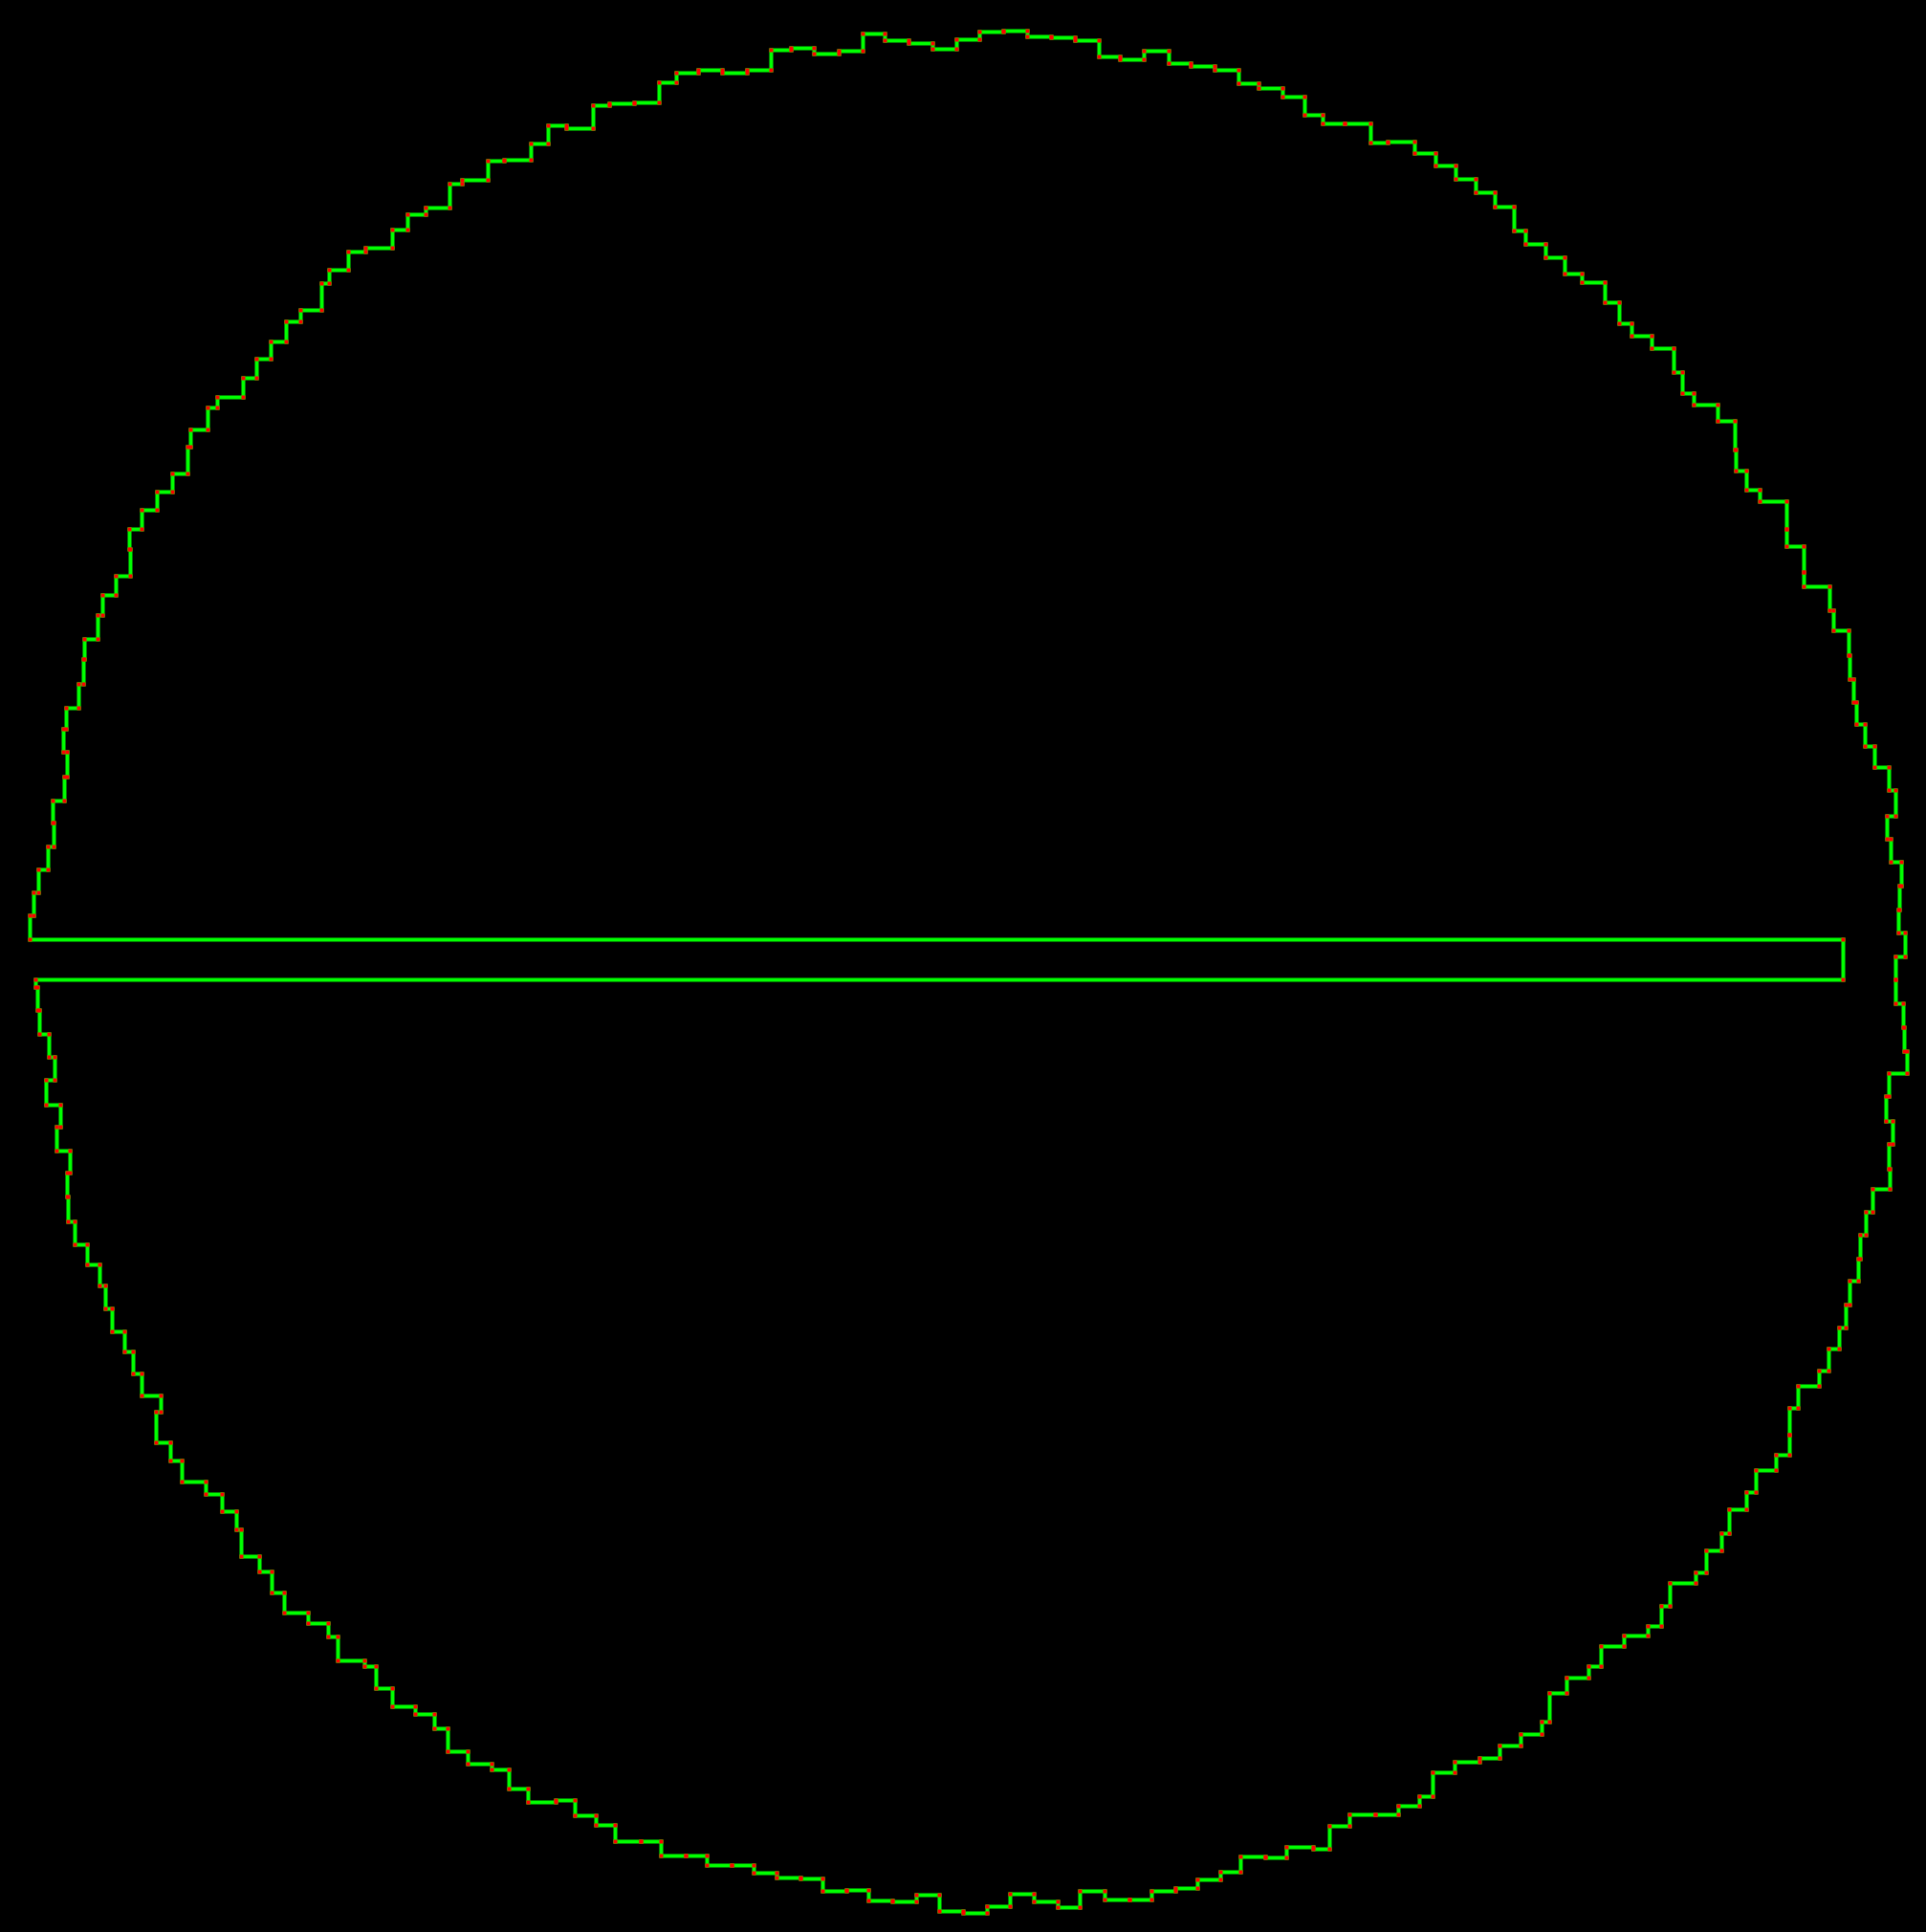

In [23]:
import java.awt.BasicStroke
import java.awt.Color
import java.awt.geom.AffineTransform
import java.awt.image.AffineTransformOp
import java.awt.image.BufferedImage

private object ThingDrawer {
    private data class Coord(val x: Int, val y: Int)

    fun draw(): BufferedImage {
        val lines = File("data/day9.txt").useLines { lines -> lines.toList() }
        val coords = lines.map { line ->
            val split = line.split(",")
            Coord(x = split[0].toInt(), y = split[1].toInt())
        }

        val maxX = coords.maxOf { it.x }
        val maxY = coords.maxOf { it.y }
        val scale = 2000.0 / max(maxX, maxY)
        val scaled = coords.map { coord -> Coord(x = (coord.x * scale).roundToInt(), y = (coord.y * scale).roundToInt()) }
        val width = scaled.maxOf { it.x } + 20
        val height = scaled.maxOf { it.y } + 20

        val image = BufferedImage(width.toInt(), height.toInt(), BufferedImage.TYPE_INT_ARGB)
        val graphics = image.createGraphics()
        graphics.background = Color.BLACK
        graphics.clearRect(0, 0, width, height)
        graphics.setRenderingHint(
            java.awt.RenderingHints.KEY_ANTIALIASING,
            java.awt.RenderingHints.VALUE_ANTIALIAS_ON
        )
        graphics.stroke = BasicStroke(4f)

        graphics.color = Color.GREEN
        val first = scaled.first()
        val last = scaled.last()
        graphics.drawLine(first.x, first.y, last.x, last.y)
        scaled.windowed(2).forEach { chunk ->
            graphics.drawLine(chunk[0].x, chunk[0].y, chunk[1].x, chunk[1].y)
        }

        graphics.color = Color.RED
        scaled.forEach { coord ->
            graphics.drawLine(coord.x, coord.y, coord.x, coord.y)
        }

        graphics.dispose()
        return image
    }
}

ThingDrawer.draw()

In [24]:
class DayNinePartTwo(override val testResult: Int = 24) : Problem<Int>("day9.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val coords = lines.toList().map { line ->
            Coord(
                x = line.substringBefore(',').toInt(),
                y = line.substringAfter(',').toInt()
            )
        }
        val shape = Shape(coords)

        var largest = 0
        for (i in 0 until coords.size) {
            for (j in (i + 1) until coords.size) {
                val c1 = coords[i]
                val c2 = coords[j]
                val area = area(c1, c2)
                if (area < largest) {
                    continue
                }
                if (!shape.containsAllCorners(c1, c2)) {
                    continue
                }
                if (shape.isRectangleContained(c1, c2)) {
                    largest = area
                }
            }
        }
        return largest
    }

    fun area(c1: Coord, c2: Coord) = (abs(c1.x - c2.x) + 1) * (abs(c1.y - c2.y) + 1)

    data class Shape(private val coords: List<Coord>) {
        private val edges: List<Edge> = listOf(Edge(start = coords.last(), coords.first())) +
                coords.windowed(2).map { Edge(start = it[0], end = it[1]) }

        fun containsAllCorners(c1: Coord, c2: Coord): Boolean {
            val corners = listOf(
                Coord(c1.x, c2.y),
                Coord(c2.x, c1.y),
            )
            corners.forEach { coord ->
                if (!isPointContained(coord)) {
                    return false
                }
            }
            return true
        }

        fun isRectangleContained(c1: Coord, c2: Coord): Boolean {
            val points = mutableListOf<Coord>()
            for (x in (min(c1.x, c2.x) + 1)..(max(c1.x, c2.x) - 1)) {
                points.add(Coord(x, c1.y))
                points.add(Coord(x, c2.y))
            }
            for (y in (min(c1.y, c2.y) + 1)..(max(c1.y, c2.y) - 1)) {
                points.add(Coord(c1.x, y))
                points.add(Coord(c2.x, y))
            }
            points.forEach { coord ->
                if (!isPointContained(coord)) return false
            }
            return true
        }

        private fun isPointContained(coord: Coord): Boolean {
            // Check points
            if (coords.contains(coord)) return true

            // Check edges
            edges.firstOrNull {
                (it.start.x == coord.x && it.end.x == coord.x && coord.y >= it.minY && coord.y <= it.maxY) ||
                        (it.start.y == coord.y && it.end.y == coord.y && coord.x >= it.minX && coord.x <= it.maxX)
            }?.let {
                return true
            }

            // Add .5 to x & y to avoid checking vertical edges
            val x = coord.x.toDouble() + .5
            val y = coord.y.toDouble() + .5

            // Check if in edges
            edges.count { edge ->
                val edgeIsVertOfPoint = edge.minX <= x && x <= edge.maxX
                val edgeIsGreaterThanPoint = edge.start.y > coord.y && edge.end.y > coord.y
                edgeIsVertOfPoint && edgeIsGreaterThanPoint
            }.let {
                if (it % 2 == 0) return false
            }
            edges.count { edge ->
                val edgeIsHorzOfPoint = edge.minY <= y && y <= edge.maxY
                val edgeIsGreaterThanPoint = edge.start.x > coord.x && edge.end.x > coord.x
                edgeIsHorzOfPoint && edgeIsGreaterThanPoint
            }.let {
                if (it % 2 == 0) return false
            }
            return true
        }

        private data class Edge(val start: Coord, val end: Coord) {
            val minX = min(start.x, end.x)
            val maxX = max(start.x, end.x)
            val minY = min(start.y, end.y)
            val maxY = max(start.y, end.y)
        }
    }

    data class Coord(val x: Int, val y: Int) {
        override fun toString(): String = "($x, $y)"
    }
}

DayNinePartTwo().run()

Test results: Expected=24 Actual=24
Solution: 1516172795


## Day 10
### Part 1
Just across the hall, you find a large factory. Fortunately, the Elves here have plenty of time to decorate. Unfortunately, it's because the factory machines are all offline, and none of the Elves can figure out the initialization procedure.

The Elves do have the manual for the machines, but the section detailing the initialization procedure was eaten by a Shiba Inu. All that remains of the manual are some indicator light diagrams, button wiring schematics, and joltage requirements for each machine.

For example:
```
[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}
[...#.] (0,2,3,4) (2,3) (0,4) (0,1,2) (1,2,3,4) {7,5,12,7,2}
[.###.#] (0,1,2,3,4) (0,3,4) (0,1,2,4,5) (1,2) {10,11,11,5,10,5}
```
The manual describes one machine per line. Each line contains a single indicator light diagram in `[square brackets]`, one or more button wiring schematics in `(parentheses)`, and joltage requirements in `{curly braces}`.

To start a machine, its indicator lights must match those shown in the diagram, where . means off and # means on. The machine has the number of indicator lights shown, but its indicator lights are all initially off.

So, an indicator light diagram like `[.##.]` means that the machine has four indicator lights which are initially off and that the goal is to simultaneously configure the first light to be off, the second light to be on, the third to be on, and the fourth to be off.

You can toggle the state of indicator lights by pushing any of the listed buttons. Each button lists which indicator lights it toggles, where 0 means the first light, 1 means the second light, and so on. When you push a button, each listed indicator light either turns on (if it was off) or turns off (if it was on). You have to push each button an integer number of times; there's no such thing as "0.5 presses" (nor can you push a button a negative number of times).

So, a button wiring schematic like `(0,3,4)` means that each time you push that button, the first, fourth, and fifth indicator lights would all toggle between on and off. If the indicator lights were `[#.....]`, pushing the button would change them to be `[...##.]` instead.

Because none of the machines are running, the joltage requirements are irrelevant and can be safely ignored.

You can push each button as many times as you like. However, to save on time, you will need to determine the fewest total presses required to correctly configure all indicator lights for all machines in your list.

There are a few ways to correctly configure the first machine:

`[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}`
You could press the first three buttons once each, a total of 3 button presses.
You could press (1,3) once, (2,3) once, and (0,1) twice, a total of 4 button presses.
You could press all of the buttons except (1,3) once each, a total of 5 button presses.
However, the fewest button presses required is 2. One way to do this is by pressing the last two buttons ((0,2) and (0,1)) once each.

The second machine can be configured with as few as 3 button presses:

`[...#.] (0,2,3,4) (2,3) (0,4) (0,1,2) (1,2,3,4) {7,5,12,7,2}`
One way to achieve this is by pressing the last three buttons ((0,4), (0,1,2), and (1,2,3,4)) once each.

The third machine has a total of six indicator lights that need to be configured correctly:

`[.###.#] (0,1,2,3,4) (0,3,4) (0,1,2,4,5) (1,2) {10,11,11,5,10,5}`
The fewest presses required to correctly configure it is 2; one way to do this is by pressing buttons `(0,3,4)` and `(0,1,2,4,5)` once each.

So, the fewest button presses required to correctly configure the indicator lights on all of the machines is 2 + 3 + 2 = 7.

Analyze each machine's indicator light diagram and button wiring schematics. What is the fewest button presses required to correctly configure the indicator lights on all of the machines?

In [25]:
class DayTenPartOne(override val testResult: Int = 7) : Problem<Int>("day10.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val machines = lines.toList().map { line ->
            val split = line.split(" ")
            val numLights = split[0].length - 3
            val success = split[0].mapNotNull { char ->
                when (char) {
                    '.' -> '0'
                    '#' -> '1'
                    else -> null
                }
            }.joinToString("").toInt(2)
            val buttons = split.drop(1).dropLast(1).map { point ->
                val indices = point.removeSurrounding("(", ")").split(',').map { it.toInt() }
                var outString = ""
                for (i in 0..numLights) {
                    outString += if (indices.contains(i)) "1" else "0"
                }
                outString.toInt(2)
            }
            Machine(numLights = numLights, success = success, buttons = buttons)
        }

        val shortest = machines.mapIndexed { index, machine ->
            var numButtonPushes = 1
            while (numButtonPushes <= machine.buttons.size) {
                machine.buttons.combinations(numButtonPushes).forEach { combo ->
                    var out = combo.first()
                    for (i in 1 until combo.size) {
                        out = out xor combo[i]
                    }
                    if (out == machine.success) {
                        return@mapIndexed numButtonPushes
                    }
                }
                numButtonPushes++
            }
            Int.MIN_VALUE
        }

        return shortest.sumOf { it }
    }

    private fun List<Int>.combinations(size: Int): List<List<Int>> {
        if (size == 0) return listOf(emptyList())
        if (this.isEmpty() || size > this.size) return emptyList()
        val head = this.first()
        val tail = this.drop(1)

        val combinationsWithHead = tail.combinations(size - 1).map {
            listOf(head) + it
        }
        val combinationsWithoutHead = tail.combinations(size)

        return combinationsWithHead + combinationsWithoutHead
    }

    data class Machine(val numLights: Int, val success: Int, val buttons: List<Int>)
}

DayTenPartOne().run()

Test results: Expected=7 Actual=7
Solution: 520


### Part 2
All of the machines are starting to come online! Now, it's time to worry about the joltage requirements.

Each machine needs to be configured to exactly the specified joltage levels to function properly. Below the buttons on each machine is a big lever that you can use to switch the buttons from configuring the indicator lights to increasing the joltage levels. (Ignore the indicator light diagrams.)

The machines each have a set of numeric counters tracking its joltage levels, one counter per joltage requirement. The counters are all initially set to zero.

So, joltage requirements like {3,5,4,7} mean that the machine has four counters which are initially 0 and that the goal is to simultaneously configure the first counter to be 3, the second counter to be 5, the third to be 4, and the fourth to be 7.

The button wiring schematics are still relevant: in this new joltage configuration mode, each button now indicates which counters it affects, where 0 means the first counter, 1 means the second counter, and so on. When you push a button, each listed counter is increased by 1.

So, a button wiring schematic like (1,3) means that each time you push that button, the second and fourth counters would each increase by 1. If the current joltage levels were {0,1,2,3}, pushing the button would change them to be {0,2,2,4}.

You can push each button as many times as you like. However, your finger is getting sore from all the button pushing, and so you will need to determine the fewest total presses required to correctly configure each machine's joltage level counters to match the specified joltage requirements.

Consider again the example from before:
```
[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}
[...#.] (0,2,3,4) (2,3) (0,4) (0,1,2) (1,2,3,4) {7,5,12,7,2}
[.###.#] (0,1,2,3,4) (0,3,4) (0,1,2,4,5) (1,2) {10,11,11,5,10,5}
```
Configuring the first machine's counters requires a minimum of 10 button presses. One way to do this is by pressing (3) once, (1,3) three times, (2,3) three times, (0,2) once, and (0,1) twice.

Configuring the second machine's counters requires a minimum of 12 button presses. One way to do this is by pressing (0,2,3,4) twice, (2,3) five times, and (0,1,2) five times.

Configuring the third machine's counters requires a minimum of 11 button presses. One way to do this is by pressing (0,1,2,3,4) five times, (0,1,2,4,5) five times, and (1,2) once.

So, the fewest button presses required to correctly configure the joltage level counters on all of the machines is 10 + 12 + 11 = 33.

Analyze each machine's joltage requirements and button wiring schematics. What is the fewest button presses required to correctly configure the joltage level counters on all of the machines?

In [34]:
%use multik

class DayTenPartTwo(override val testResult: Int = 33) : Problem<Int>("day10.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val data = lines.toList().map { line ->
            val split = line.split(' ').drop(1)
            val buttons = split.dropLast(1).map { button -> button.removeSurrounding("(", ")").split(",").map { it.toInt() } }
            val joltages = split.last().removeSurrounding("{", "}").split(",").map { it.toInt() }
            Machine(buttons, joltages)
        }

        data.forEach { machine ->
            val numJoltages = machine.joltages.size
            val buttonMatrix = List(machine.buttons.size) { index ->
                if (index < numJoltages) {
                    machine.buttons.map { if (it.contains(index)) 1 else 0 }
                } else {
                    List(machine.buttons.size) { if (it == index) 1 else 0 }
                }
            }
            val a = mk.ndarray(buttonMatrix)
            val b = mk.ndarray(machine.joltages + List(machine.buttons.size - machine.joltages.size) { 1 })
            //mk.linalg.det(a)
            mk.linalg.solve(a, b)
        }

        return 3
    }

    class Machine(val buttons: List<List<Int>>, val joltages: List<Int>)
}

DayTenPartTwo().run()

java.lang.Exception: The diagonal element of the triangular factor of a is zero, so that A is singular. The solution could not be computed.

## Day 10
### Part 1
You hear some loud beeping coming from a hatch in the floor of the factory, so you decide to check it out. Inside, you find several large electrical conduits and a ladder.

Climbing down the ladder, you discover the source of the beeping: a large, toroidal reactor which powers the factory above. Some Elves here are hurriedly running between the reactor and a nearby server rack, apparently trying to fix something.

One of the Elves notices you and rushes over. "It's a good thing you're here! We just installed a new server rack, but we aren't having any luck getting the reactor to communicate with it!" You glance around the room and see a tangle of cables and devices running from the server rack to the reactor. She rushes off, returning a moment later with a list of the devices and their outputs (your puzzle input).

For example:
```
aaa: you hhh
you: bbb ccc
bbb: ddd eee
ccc: ddd eee fff
ddd: ggg
eee: out
fff: out
ggg: out
hhh: ccc fff iii
iii: out
```
Each line gives the name of a device followed by a list of the devices to which its outputs are attached. So, `bbb: ddd eee` means that device `bbb` has two outputs, one leading to device `ddd` and the other leading to device `eee`.

The Elves are pretty sure that the issue isn't due to any specific device, but rather that the issue is triggered by data following some specific path through the devices. Data only ever flows from a device through its outputs; it can't flow backwards.

After dividing up the work, the Elves would like you to focus on the devices starting with the one next to you (an Elf hastily attaches a label which just says you) and ending with the main output to the reactor (which is the device with the label `out`).

To help the Elves figure out which path is causing the issue, they need you to find every path from you to out.

In this example, these are all of the paths from you to out:

Data could take the connection from you to bbb, then from bbb to ddd, then from ddd to ggg, then from ggg to out.
Data could take the connection to bbb, then to eee, then to out.
Data could go to ccc, then ddd, then ggg, then out.
Data could go to ccc, then eee, then out.
Data could go to ccc, then fff, then out.
In total, there are 5 different paths leading from you to out.

How many different paths lead from you to out?

In [21]:
class DayElevenPartOne(override val testResult: Int = 5) : Problem<Int>("day11.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val data = lines.map { line ->
            val key = line.substringBefore(':')
            val outputs = line.substringAfter(": ").split(' ')
            key to outputs
        }.toMap()

        var paths: List<String> = listOf("you")
        while (!paths.all { it == "out" }) {
            paths = paths.flatMap { if (it == "out") listOf("out") else data[it]!! }
        }

        return paths.size
    }
}

DayElevenPartOne().run()

Test results: Expected=5 Actual=5
Solution: 470


In [ ]:
class DayElevenPartTwo(override val testResult: Int = 2) : Problem<Int>("day11_2.txt") {
    override fun solve(lines: Sequence<String>): Int {
        val data = lines.map { line ->
            val key = line.substringBefore(':')
            val outputs = line.substringAfter(':').trim().split(" ")
            key to outputs
        }.toMap()

        val cry = 0

        return cry
    }
}

DayElevenPartTwo().run()

Test results: Expected=2 Actual=2
